In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
from scipy.interpolate import interp1d
def phase_diag_contour_mass_level(X, Y, N_bin, levels, weight=None):
    """
    plot the phase diagram of physical quantity X and Y.
    The weights of each point, e.g. cell mass, are needed to be specified
    in order to calculate the contour lines, within which fractions of mass
    are enclosed.
    """
    if weight!=None:
        result = np.histogram2d(X, Y, bins=N_bin, weights=weight)
    else:
        result = np.histogram2d(X, Y, bins=N_bin)
    N_matrix = result[0]
    x_c = (result[1][0:-1]+result[1][1:])/2.
    y_c = (result[2][0:-1]+result[2][1:])/2.
    weight_sort = np.sort(np.reshape(N_matrix, (N_matrix.size)))
    weight_cum = np.cumsum(weight_sort)
    f = interp1d(weight_cum, weight_sort)
    weight_level = np.array([f((1.0-l)*weight_cum[-1]) for l in levels])
    
    #plt.scatter(X,Y,s=1, alpha=0.1, c=weight)
    
    X_mesh, Y_mesh = np.meshgrid(x_c, y_c)

    cs = plt.contour(X_mesh, Y_mesh, N_matrix.T, levels=weight_level)
    fmt = {}
    strs = np.array(["{0:.0f}%".format(l*100) for l in levels])
    for l,s in zip( cs.levels, strs ):
        fmt[l] = s
    plt.clabel(cs, cs.levels, fmt=fmt, fontsize=10 )

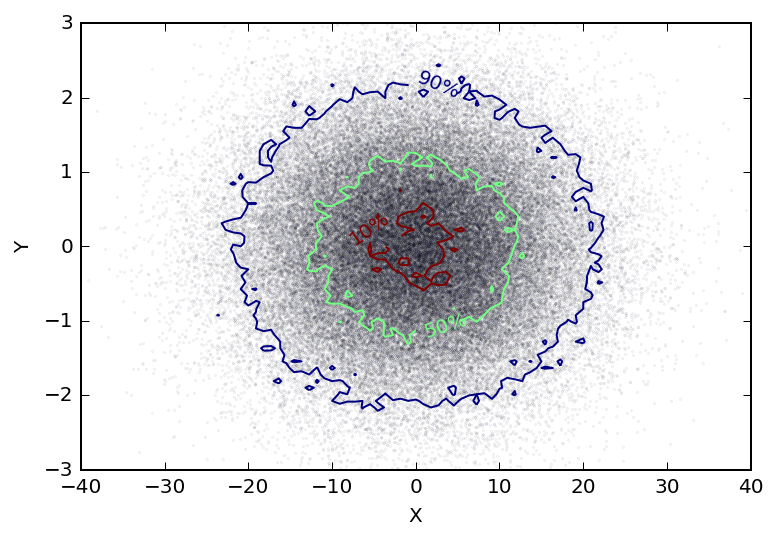

In [6]:
x = np.random.normal(0, 10, 100000)
y = np.random.normal(0, 1, 100000)
plt.scatter(x,y,s=0.1,alpha=0.1)
phase_diag_contour_mass_level(x,y,[100,100],[0.9,0.5,0.1])
plt.xlim(-40,40)
plt.ylim(-3,3)
plt.xlabel('X')
plt.ylabel('Y')